Mean Squared Error: 108.41
R² Score: 0.39


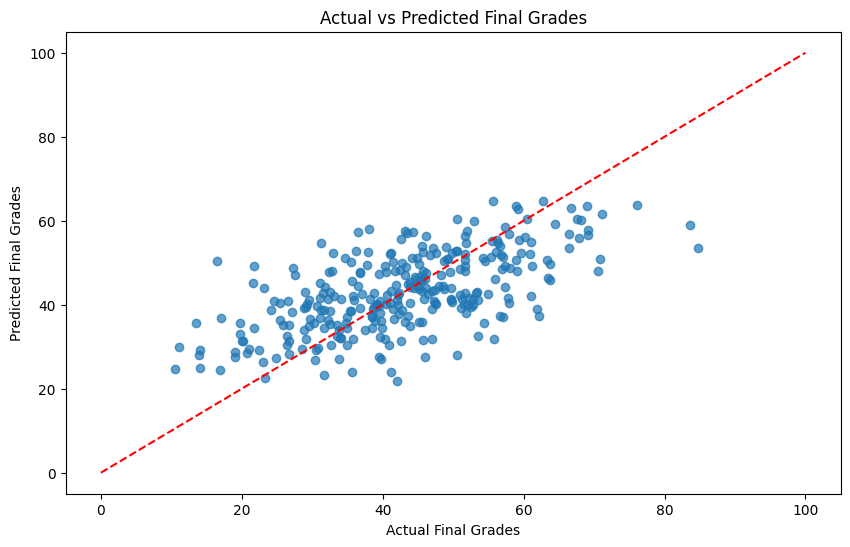

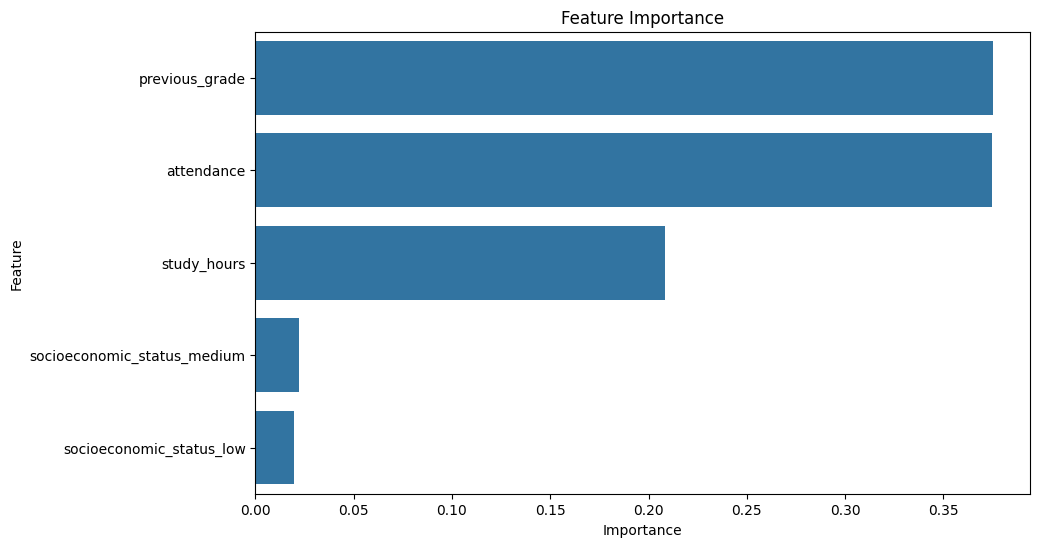

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Creating a synthetic dataset
np.random.seed(42)
data_size = 1000

data = {
    'attendance': np.random.uniform(50, 100, data_size),  # Percentage of attendance
    'study_hours': np.random.uniform(0, 20, data_size),   # Hours studied per week
    'previous_grade': np.random.uniform(0, 100, data_size),  # Previous grades
    'socioeconomic_status': np.random.choice(['low', 'medium', 'high'], data_size),  # Categorical
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Encoding categorical variables
df = pd.get_dummies(df, columns=['socioeconomic_status'], drop_first=True)

# Target variable: Let's say we want to predict a final grade
df['final_grade'] = (0.4 * df['attendance'] +
                     0.4 * df['study_hours'] +
                     0.2 * df['previous_grade'] +
                     np.random.normal(0, 10, data_size))  # Adding some noise

# Splitting the data into features and target
X = df.drop('final_grade', axis=1)
y = df['final_grade']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Plotting predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.title('Actual vs Predicted Final Grades')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.show()

# Feature Importance
importance = model.feature_importances_
features = X.columns

# Creating a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()


NameError: name 'model' is not defined

NameError: name 'model' is not defined